In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
cps = pd.read_csv('/Users/felixbuchholz/repos/thesis/visualizing/data/cps-python/cps_00004.csv')

In [3]:
print(cps.shape)
print(type(cps))

(180084, 71)
<class 'pandas.core.frame.DataFrame'>


In [4]:
''' '''
cps = cps[cps.AGE < 64]
# cps = cps[cps.AGE > 15]
print(cps['ASECWT'].sum())

268356150.26


In [5]:
print(cps.head(1))

   YEAR  SERIAL  MONTH           CPSID  ASECFLAG  ASECWTH  PERNUM  \
1  2018       4      3  20180302858200         1   824.29       1   

           CPSIDP  ASECWT  AGE    ...     SPMHEAT  SPMSNAP  DISABWRK  HEALTH  \
1  20180302858201  824.29   48    ...         0.0        0         1       3   

   QUITSICK  HIMCAID  HIMCARE  HICHAMP  GOTWIC  KIDCNEED  
1         2        1        1        1       0         0  

[1 rows x 71 columns]


In [6]:
list(cps)

['YEAR',
 'SERIAL',
 'MONTH',
 'CPSID',
 'ASECFLAG',
 'ASECWTH',
 'PERNUM',
 'CPSIDP',
 'ASECWT',
 'AGE',
 'SEX',
 'RACE',
 'BPL',
 'CITIZEN',
 'EMPSTAT',
 'LABFORCE',
 'FTOTVAL',
 'INCTOT',
 'INCWAGE',
 'INCBUS',
 'INCFARM',
 'INCSS',
 'INCWELFR',
 'INCRETIR',
 'INCSSI',
 'INCINT',
 'INCUNEMP',
 'INCWKCOM',
 'INCVET',
 'INCSURV',
 'INCDISAB',
 'INCDIVID',
 'INCRENT',
 'INCEDUC',
 'INCCHILD',
 'INCASIST',
 'INCOTHER',
 'INCDISA1',
 'INCDISA2',
 'INCRETI1',
 'INCRETI2',
 'INCSURV1',
 'INCSURV2',
 'OINCBUS',
 'OINCFARM',
 'OINCWAGE',
 'SSIKID',
 'SSKID',
 'CTCCRD',
 'ACTCCRD',
 'ADJGINC',
 'EITCRED',
 'FEDRETIR',
 'FEDTAX',
 'FEDTAXAC',
 'FICA',
 'TAXINC',
 'SPMLUNCH',
 'SPMCAPHOUS',
 'SPMWT',
 'SPMMEDXPNS',
 'SPMHEAT',
 'SPMSNAP',
 'DISABWRK',
 'HEALTH',
 'QUITSICK',
 'HIMCAID',
 'HIMCARE',
 'HICHAMP',
 'GOTWIC',
 'KIDCNEED']

In [7]:
cps['incTOTWeightedH'] = cps['ASECWTH']*cps['FTOTVAL']

In [8]:
print(statistics.median(cps['FTOTVAL']))

70000.0


In [9]:
cps['incAGIWeighted'] = cps['ASECWT']*cps['ADJGINC']
cps['incTotalWeighted'] = cps['ASECWT']*cps['INCTOT']
cps['incWelfareWeighted'] = cps['ASECWT']*cps['INCWELFR']
cps['incSocialSecurityWeighted'] = cps['ASECWT']*cps['INCSS']
cps['incSNAPWeighted'] = cps['ASECWT']*cps['SPMSNAP']

In [10]:
bins = list(range(21))
bins = [7000*x for x in bins]
bins[0] -= 1
# bins = [-1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]
print(bins)
cps['incBinned'] = pd.cut(cps['ADJGINC'], bins)


[-1, 7000, 14000, 21000, 28000, 35000, 42000, 49000, 56000, 63000, 70000, 77000, 84000, 91000, 98000, 105000, 112000, 119000, 126000, 133000, 140000]


In [11]:
# cps.drop(columns=['incBinned'])

In [12]:
binnedByAGI = cps.groupby(['incBinned']).sum()

In [13]:
binnedByAGI['meanAGIIncome'] = binnedByAGI['incAGIWeighted']/binnedByAGI['ASECWT']
binnedByAGI['meanTotalIncome'] = binnedByAGI['incTotalWeighted']/binnedByAGI['ASECWT']
binnedByAGI['meanWelfareIncome'] = binnedByAGI['incWelfareWeighted']/binnedByAGI['ASECWT']
binnedByAGI['meanSocialSecurtiyIncome'] = binnedByAGI['incSocialSecurityWeighted']/binnedByAGI['ASECWT']
binnedByAGI['meanSNAPIncome'] = binnedByAGI['incSNAPWeighted']/binnedByAGI['ASECWT']

In [14]:
print(binnedByAGI.shape)
print(binnedByAGI.head(10))

(20, 82)
                     YEAR      SERIAL   MONTH               CPSID  ASECFLAG  \
incBinned                                                                     
(-1, 7000]      108614814  2577545284  161469  663077436884971008     53823   
(7000, 14000]     9456348   223080335   14058   58684628433993592      4686   
(14000, 21000]   11193846   276848600   16641   68711484165793520      5547   
(21000, 28000]   10717598   258898189   15933   68630653465005680      5311   
(28000, 35000]   10219152   246897267   15192   64757498027268784      5064   
(35000, 42000]    9153648   220371921   13608   60036550587606768      4536   
(42000, 49000]    6564554   155262532    9759   43272045432937136      3253   
(49000, 56000]    7030712   165596881   10452   46015729611965736      3484   
(56000, 63000]    5432456   128097527    8076   36392847073813504      2692   
(63000, 70000]    4855308   114126628    7218   32539463871224500      2406   

                     ASECWTH  PERNUM      

In [15]:

test = binnedByAGI.index.to_series().astype(str)
print(test.index)

CategoricalIndex([      (-1, 7000],    (7000, 14000],   (14000, 21000],
                    (21000, 28000],   (28000, 35000],   (35000, 42000],
                    (42000, 49000],   (49000, 56000],   (56000, 63000],
                    (63000, 70000],   (70000, 77000],   (77000, 84000],
                    (84000, 91000],   (91000, 98000],  (98000, 105000],
                  (105000, 112000], (112000, 119000], (119000, 126000],
                  (126000, 133000], (133000, 140000]],
                 categories=[(-1, 7000], (7000, 14000], (14000, 21000], (21000, 28000], (28000, 35000], (35000, 42000], (42000, 49000], (49000, 56000], ...], ordered=True, name='incBinned', dtype='category')


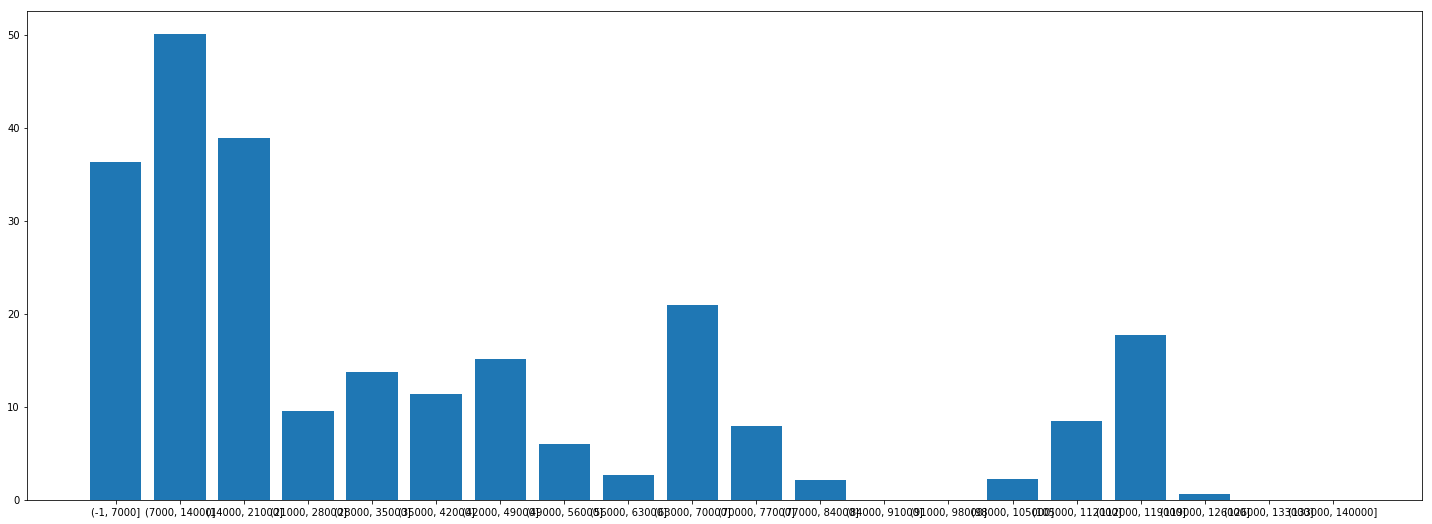

In [16]:
# Plot at some point

names = test.index.to_series().astype(str)
values = binnedByAGI['meanWelfareIncome'].tolist()

plt.figure(1, figsize=(25, 9))

plt.bar(names, values)

plt.show()

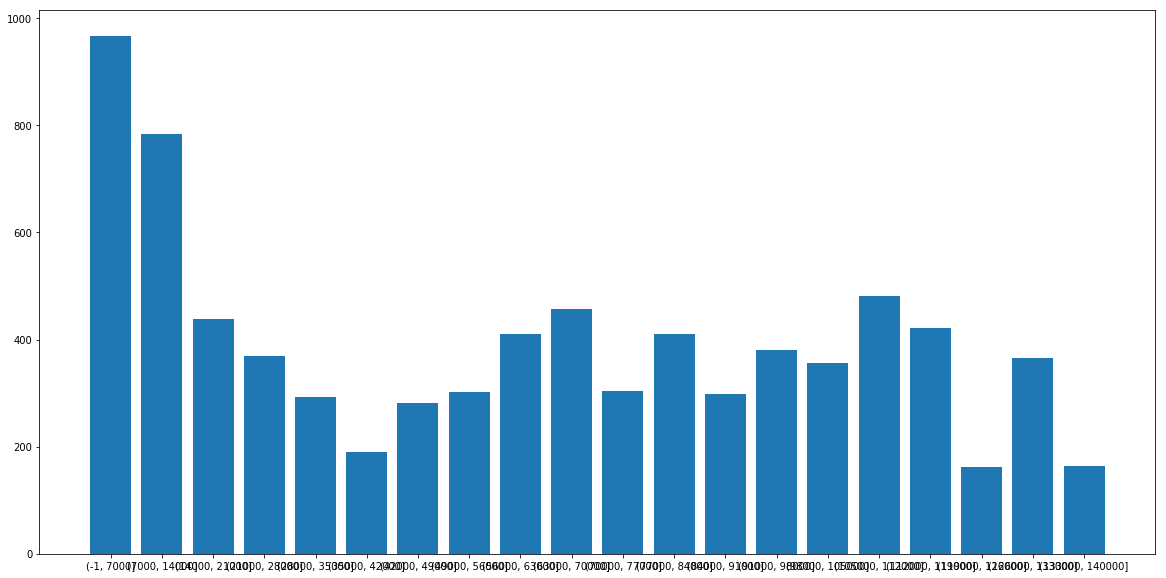

In [17]:
# Plot at some point

names = test.index.to_series().astype(str)
values = binnedByAGI['meanSocialSecurtiyIncome'].tolist()

plt.figure(1, figsize=(20, 10))

plt.bar(names, values)

plt.show()

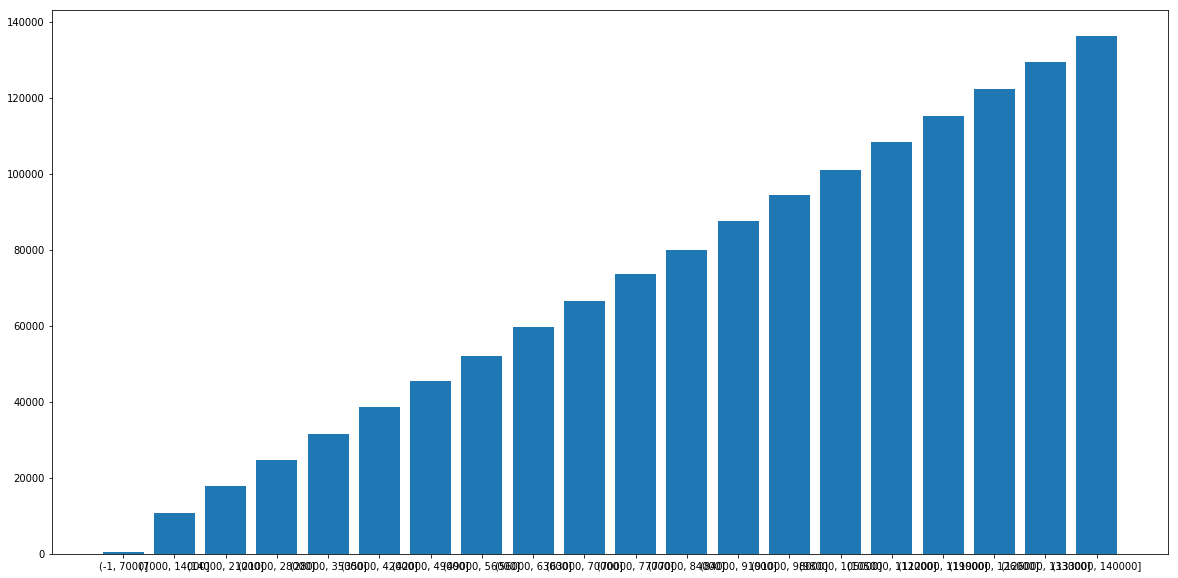

In [18]:
# Plot at some point

names = test.index.to_series().astype(str)
values = binnedByAGI['meanAGIIncome'].tolist()

plt.figure(1, figsize=(20, 10))

plt.bar(names, values)

plt.show()

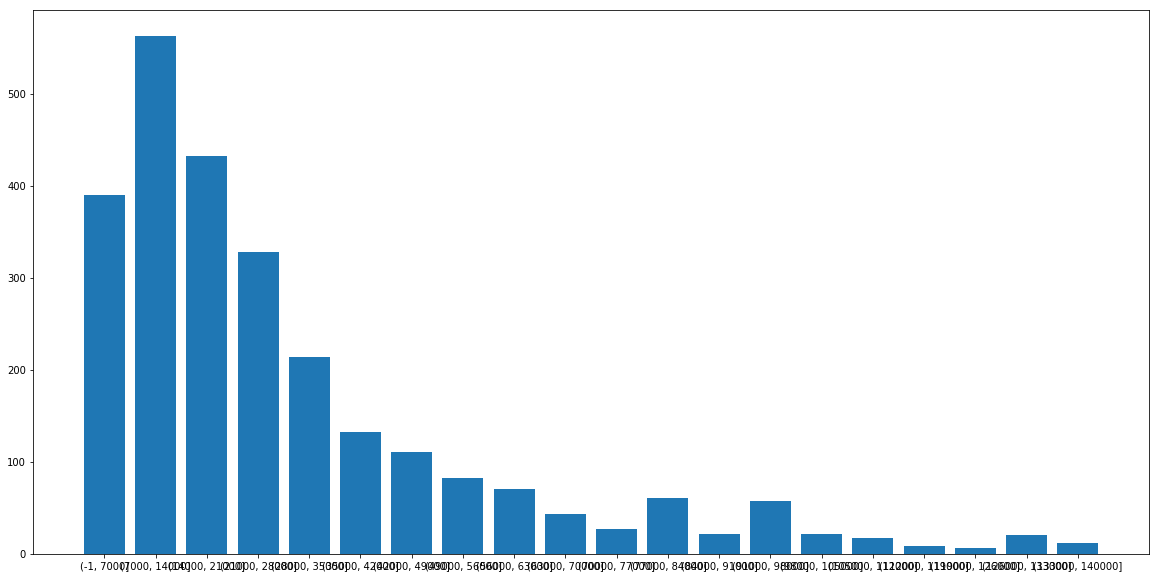

In [19]:
# Plot at some point

names = test.index.to_series().astype(str)
values = binnedByAGI['meanSNAPIncome'].tolist()

plt.figure(1, figsize=(20, 10))

plt.bar(names, values)

plt.show()